<a href="https://colab.research.google.com/github/blinovavaleriya/python-projects/blob/main/E_commerce_Data_Analysis_Sales%2C_Profit%2C_Delivery_%26_Seasonality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Connecting Google Drive

from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Mate Academy/1"


Mounted at /content/drive


In [4]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Checking files in the directory

import os
print("Files in", path)
print(os.listdir(path))


Files in /content/drive/MyDrive/Mate Academy/1
['Netflix_titles.csv', 'Sales_data_updated.csv', 'sales_data.csv', 'adult - adult.csv', 'sales_data_updated - sales_data_updated.csv', 'db (1).sqlite3', 'products.csv', 'events.csv', 'countries.csv']


In [5]:
# Loading datasets

events = pd.read_csv(path + "/events.csv")
products = pd.read_csv(path + "/products.csv")
countries = pd.read_csv(path + "/countries.csv")

print("Events:", events.shape)
print("Products:", products.shape)
print("Countries:", countries.shape)

Events: (1330, 10)
Products: (12, 2)
Countries: (249, 5)


In [6]:
# Missing values, data types, duplicates, anomalies

# Checking missing values
print(events.isna().sum())
print(products.isna().sum())
print(countries.isna().sum())

# Checking duplicates
print("Duplicates in events:", events.duplicated().sum())
print("Duplicates in products:", products.duplicated().sum())
print("Duplicates in countries:", countries.duplicated().sum())

# Removing duplicates
events.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
countries.drop_duplicates(inplace=True)


Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64
id           0
item_type    0
dtype: int64
name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64
Duplicates in events: 0
Duplicates in products: 0
Duplicates in countries: 0


In [7]:
# Data type conversion
events["Order Date"] = pd.to_datetime(events["Order Date"])
events["Ship Date"] = pd.to_datetime(events["Ship Date"])

# Additional columns: revenue and profit
events["Revenue"] = events["Units Sold"] * events["Unit Price"]
events["Cost"] = events["Units Sold"] * events["Unit Cost"]
events["Profit"] = events["Revenue"] - events["Cost"]

events.head()


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,Revenue,Cost,Profit
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,133705.00,76121.50,57583.50
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,409960.10,233400.23,176559.87
2,101025998,2014-07-18,2014-08-11,M,NaN,7940,Online,4693.0,668.27,502.54,3136191.11,2358420.22,777770.89
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,127966.88,41968.64,85998.24
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,362897.60,243129.92,119767.68


In [8]:
# Merging the three tables and calculating key metrics

# Merge with products
df = events.merge(products, left_on="Product ID", right_on="id", how="left")

# Merge with countries
df = df.merge(countries, left_on="Country Code", right_on="alpha-3", how="left")

# Key metrics
total_orders = df["Order ID"].nunique()
total_revenue = df["Revenue"].sum()
total_profit = df["Profit"].sum()
total_countries = df["name"].nunique()

print("Total number of orders:", total_orders)
print("Total revenue:", total_revenue)
print("Total profit:", total_profit)
print("Number of countries covered:", total_countries)

import matplotlib.pyplot as plt


Total number of orders: 1330
Total revenue: 1702129408.21
Total profit: 501434459.0
Number of countries covered: 45


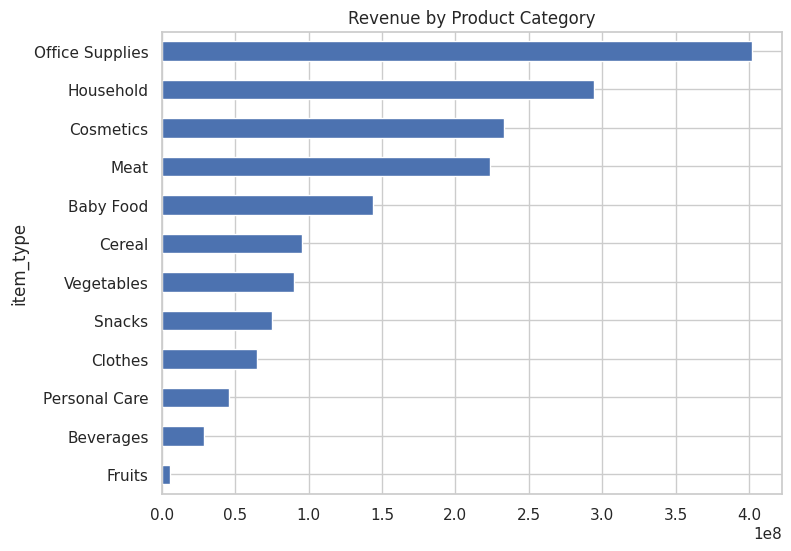

In [9]:
# Sales by product category
df.groupby("item_type")["Revenue"].sum().sort_values().plot(kind="barh", figsize=(8, 6))
plt.title("Revenue by Product Category")
plt.show()


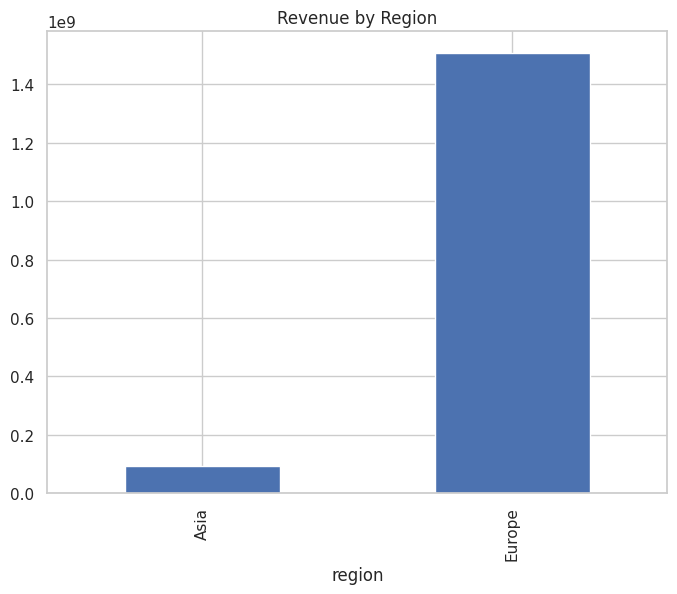

In [10]:
# Sales by region
df.groupby("region")["Revenue"].sum().sort_values().plot(kind="bar", figsize=(8, 6))
plt.title("Revenue by Region")
plt.show()


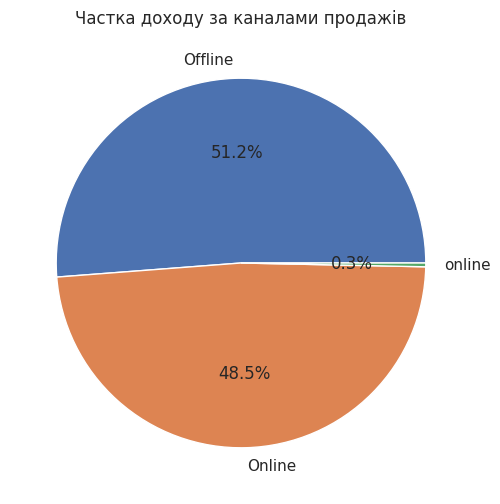

In [12]:
# Online vs Offline
df.groupby("Sales Channel")["Revenue"].sum().plot(kind="pie", autopct='%1.1f%%', figsize=(6,6))
plt.title("Частка доходу за каналами продажів")
plt.ylabel("")
plt.show()

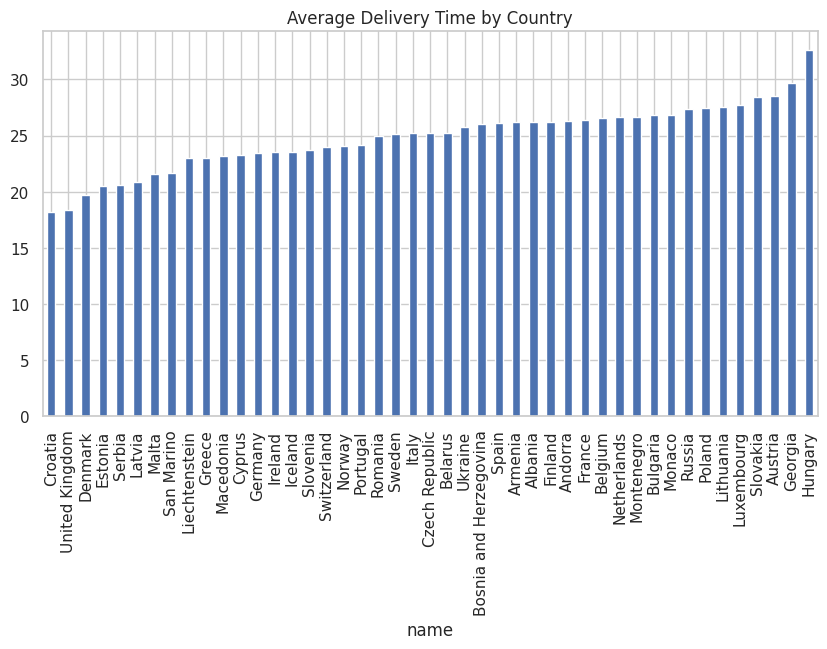

In [13]:
# Calculating delivery time
df["Delivery Time"] = (df["Ship Date"] - df["Order Date"]).dt.days

# Average delivery time by country
delivery_by_country = df.groupby("name")["Delivery Time"].mean().sort_values()
delivery_by_country.plot(kind="bar", figsize=(10, 5))
plt.title("Average Delivery Time by Country")
plt.show()


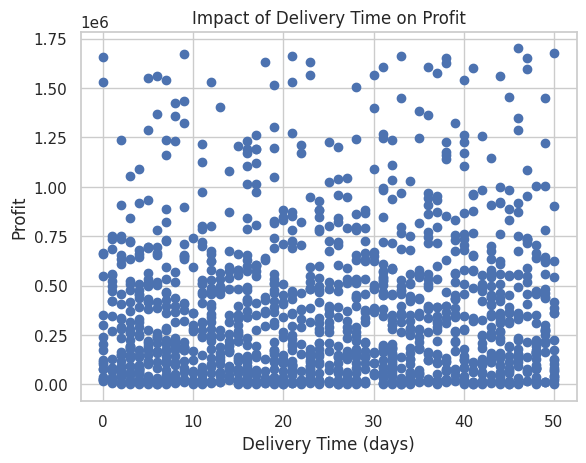

In [14]:
# Profit vs Delivery Time
plt.scatter(df["Delivery Time"], df["Profit"])
plt.xlabel("Delivery Time (days)")
plt.ylabel("Profit")
plt.title("Impact of Delivery Time on Profit")
plt.show()


/tmp/ipython-input-259278548.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index("Order Date").resample("M")["Revenue"].sum().plot(figsize=(12, 6))


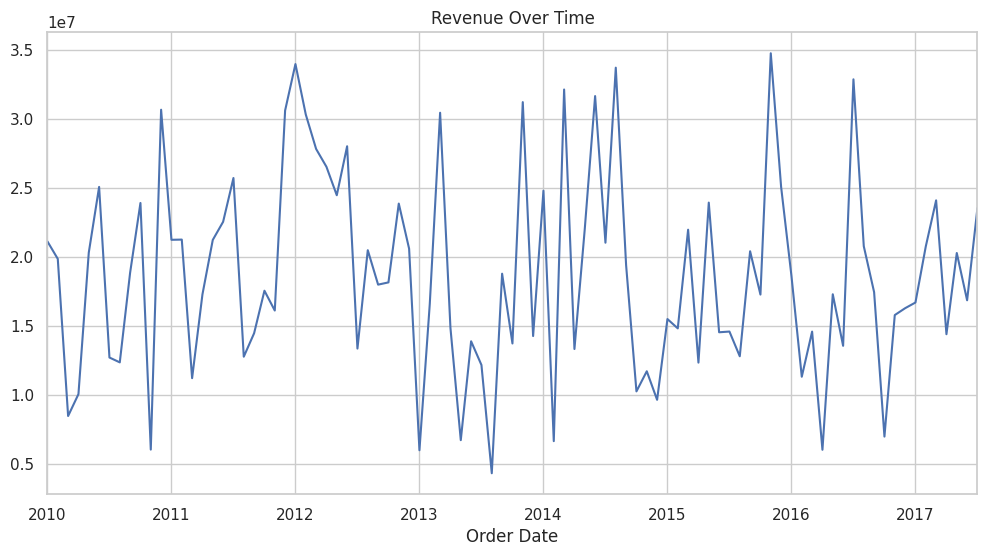

In [15]:
# Monthly revenue
df.set_index("Order Date").resample("M")["Revenue"].sum().plot(figsize=(12, 6))
plt.title("Revenue Over Time")
plt.show()


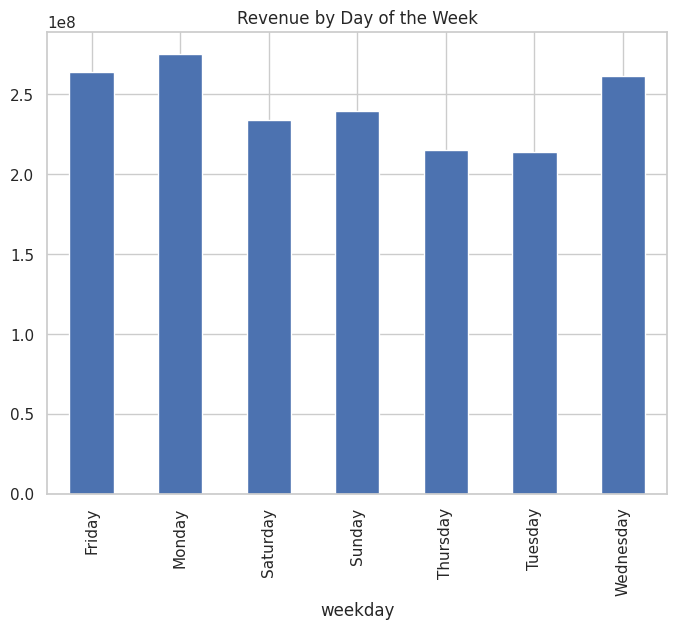

In [16]:
# Revenue by day of the week
df["weekday"] = df["Order Date"].dt.day_name()
df.groupby("weekday")["Revenue"].sum().plot(kind="bar", figsize=(8, 6))
plt.title("Revenue by Day of the Week")
plt.show()


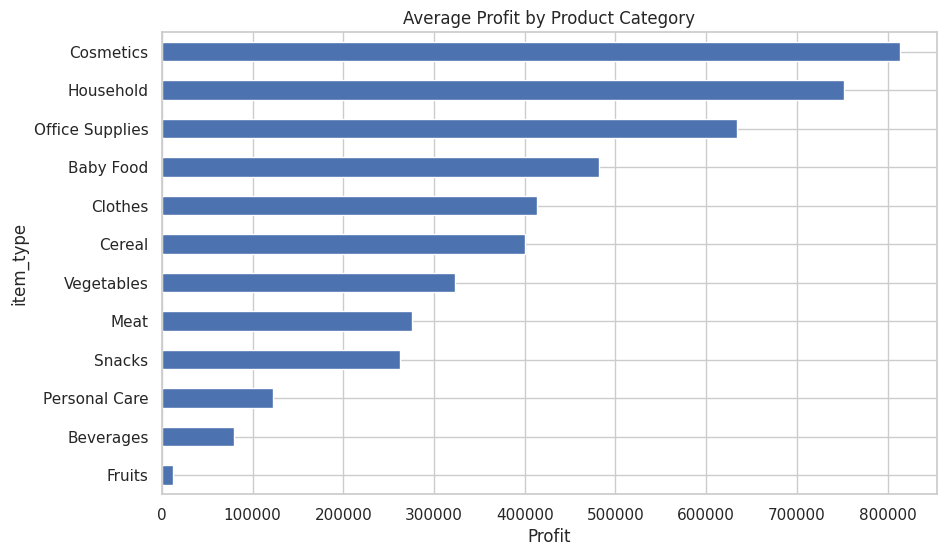

Conclusion: High-profit categories are important for business growth.


In [17]:
# Average profit by product category
plt.figure(figsize=(10, 6))
df.groupby("item_type")["Profit"].mean().sort_values().plot(kind="barh")
plt.title("Average Profit by Product Category")
plt.xlabel("Profit")
plt.show()

print("Conclusion: High-profit categories are important for business growth.")


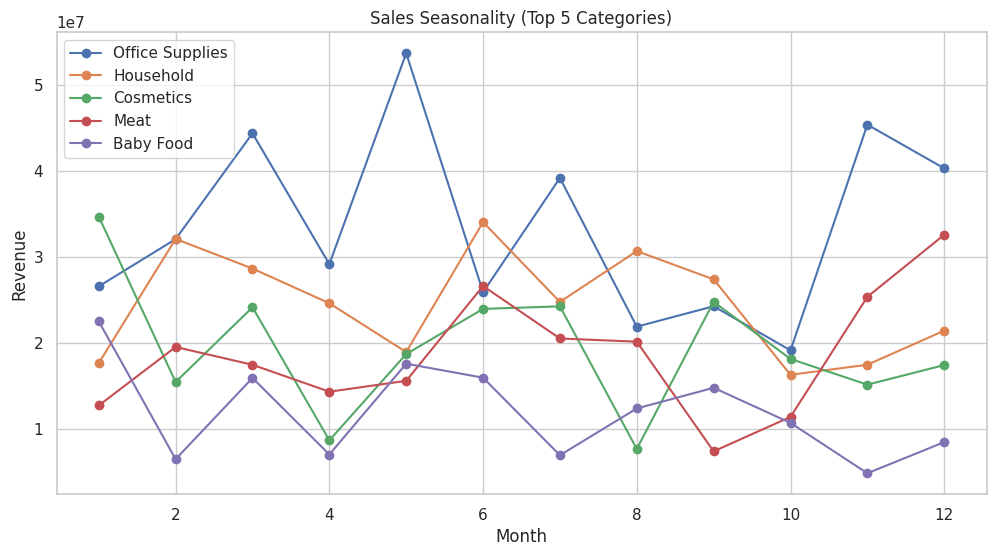

In [18]:
# Seasonality: Top 5 product categories
df['month'] = df['Order Date'].dt.month
top_items = df.groupby("item_type")["Revenue"].sum().sort_values(ascending=False).head(5).index

plt.figure(figsize=(12, 6))
for item in top_items:
    monthly = df[df['item_type'] == item].groupby('month')["Revenue"].sum()
    plt.plot(monthly.index, monthly.values, marker='o', label=item)

plt.title("Sales Seasonality (Top 5 Categories)")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.legend()
plt.show()


### ***📊 Summary of Findings***

***Key Metrics***

* Total number of orders: 1,330
* Total revenue: 1,702,129,408.21 USD
* Total profit: 501,434,459.0 USD
* Number of countries included in the analysis: 45

***Revenue Dynamics***
Revenue over time shows irregular fluctuations with distinct peak periods. Despite temporary declines, the overall revenue level remains stable without a clear downward trend.

***Sales by Day of the Week***
The highest revenue is generated at the beginning of the week (Monday), while the lowest sales are observed on Tuesday.

***Profitability by Product Category***
The most profitable categories are Cosmetics, Household, and Office Supplies.
The lowest profitability is seen in Fruits and Beverages, which may be due to their perishability or lower profit margins.

***Seasonality of Sales***
Office Supplies and Household show noticeable peaks during the spring–summer period. Cosmetics and Meat record higher sales toward the end of the year. These patterns may be influenced by corporate purchasing cycles, holiday seasons, and consumer behavior trends.

***Logistics***
The average delivery time ranges between 21–27 days.
Improving logistics efficiency could positively impact customer satisfaction and reduce operational costs.

***Regional Analysis***
The highest sales volume is observed in Europe, while the lowest is in Asia, reflecting differences in purchasing power and market size.